### Predicting medical charges 
RMS

In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)
data=pd.read_csv('/home/ahmed/Downloads/insurance.csv')
import os

import warnings
warnings.filterwarnings('ignore')
print(data)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
5      31  female  25.740         0     no  southeast   3756.62160
6      46  female  33.440         1     no  southeast   8240.58960
7      37  female  27.740         3     no  northwest   7281.50560
8      37    male  29.830         2     no  northeast   6406.41070
9      60  female  25.840         0     no  northwest  28923.13692
10     25    male  26.220         0     no  northeast   2721.32080
11     62  female  26.290         0    yes  southeast  27808.72510
12     23    male  34.400         0     no  southwest   1826.84300
13     56  female  39.820         0     no  southeast  11090.7

In [2]:
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB
None


In [4]:
print(data.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


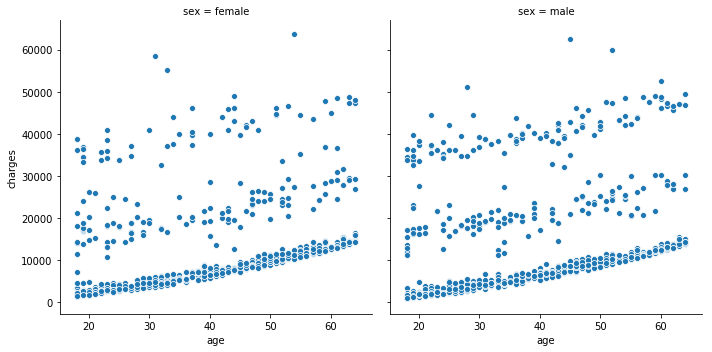

In [5]:
sns.relplot(x='age', y='charges',col='sex',data=data,palette='husl')

Text(0.5,1,'Combined effect of Age and Smoking on Charges')

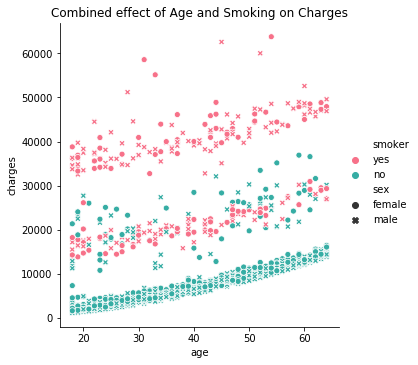

In [6]:
sns.relplot(x='age',y='charges',hue='smoker',style='sex',data=data, palette='husl')
plt.title('Combined effect of Age and Smoking on Charges')

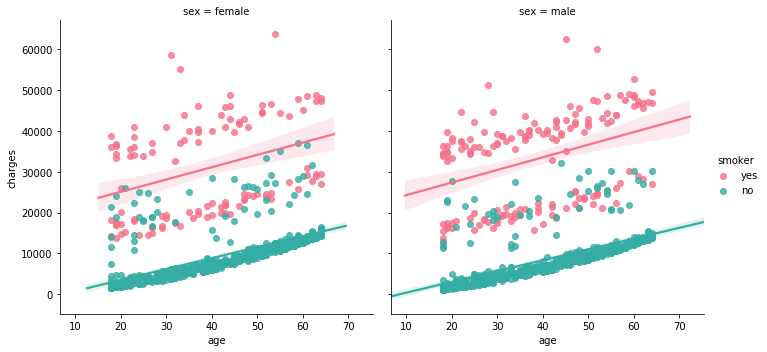

In [7]:
sns.lmplot(x='age',y='charges', hue='smoker', col='sex',data=data, palette='husl')

Text(0.5,1,'Effect of Smoking on Charges of males and females')

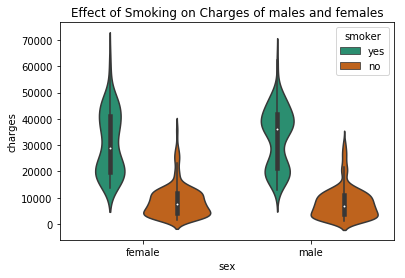

In [8]:
sns.violinplot(x='sex',y='charges',hue='smoker',data=data, palette='Dark2')
plt.title('Effect of Smoking on Charges of males and females')

In [9]:
data_grouped=data.groupby(['smoker', 'sex']).agg({'charges':'sum','sex':'count'})
data_grouped

charges  sex
smoker sex                      
no     female  4.792977e+06  547
       male    4.181085e+06  517
yes    female  3.528085e+06  115
       male    5.253679e+06  159

In [10]:
data_grouped['mean_charges']= data_grouped['charges']/data_grouped['sex']
data_grouped=data_grouped.rename(columns={'sex':'number_in_gender'})
data_grouped.index=[0,1,2,3]
data_grouped['smoker']=['no','no','yes','yes']
data_grouped['sex']=['female','male','female','male']
data_grouped=data_grouped[['smoker', 'sex','number_in_gender','charges','mean_charges']]
data_grouped


,smoker,sex,number_in_gender,charges,mean_charges
0,no,female,547,4.792977e+06,8762.297300
1,no,male,517,4.181085e+06,8087.204731
2,yes,female,115,3.528085e+06,30678.996276
3,yes,male,159,5.253679e+06,33042.005975


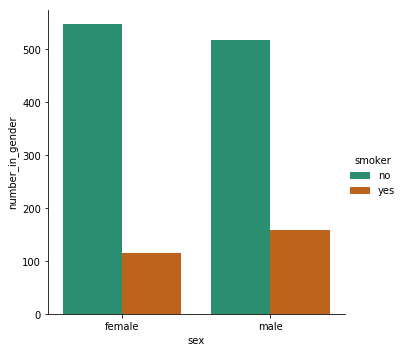

In [11]:
sns.catplot(x='sex',y='number_in_gender',hue='smoker',kind='bar',data=data_grouped,palette='Dark2')

### BMI as explained above is Body Mass Index. Higher BMI is correlated to higher body fat and thus, also correlated to metabolic diseases. BMI is thus a measure of body weight status. For adults, BMI below 18.5 is considered underweight, BMI of 18.5 – 24.9 is considered normal, BMI of 25.0 – 29.9 is considered overweight while BMI above 30 is considered obese. Therefore, I am interested to check if higher BMI can be correlated to higher medical charges.BMI's influence on medical charges become clear when I involve 'smoker' feature 

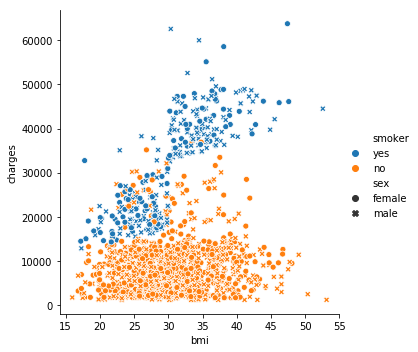

In [12]:
sns.relplot(x='bmi',y='charges',hue='smoker',style='sex',data=data)

### Here, I check the combined influence of BMI and smoking on genders separately.

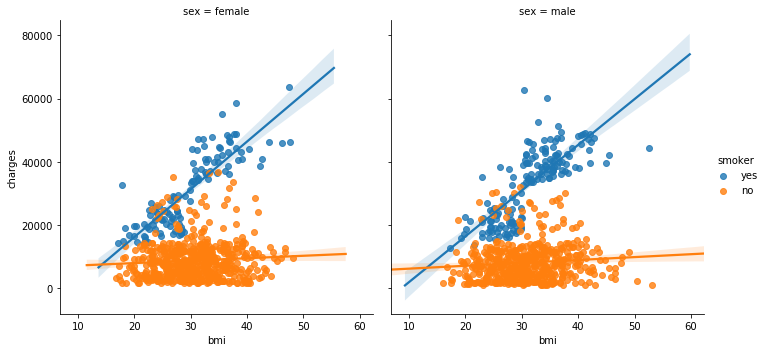

In [13]:
sns.lmplot(x='bmi',y='charges',hue='smoker', col='sex',data=data)

### As, observed in the previous plot moms and dads of 5 kids are indeed getting less medical billings as seen in the boxplot

Text(0.5,1,'Charges vs number of children')

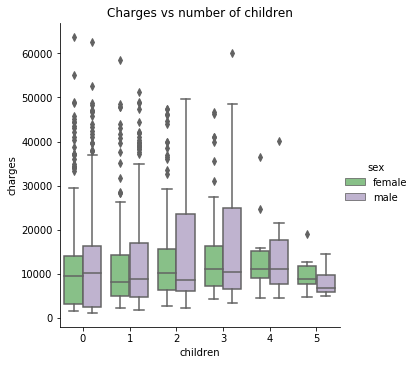

In [14]:
sns.catplot(x='children',y='charges',hue='sex',kind='box',data=data,palette='Accent')
plt.title('Charges vs number of children')

### Here, I figure out mean and median charges for parents with different number of kids. Mean charges for 5 kids parents is less while median charges for both 1 kid and 5 kids parents are low.



In [15]:
data_grouped2=data.groupby('children').agg({'charges':'sum','sex':'count'})
#data_grouped['mean_charges']= data_grouped['charges']/data_grouped['sex']
data_grouped2['mean_charges2']=data_grouped2['charges']/data_grouped2['sex']
data_grouped2['median_charges']=data.groupby('children')['charges'].median()
data_grouped2

,charges,sex,mean_charges2,median_charges
children,,,,
0,7.098070e+06,574,12365.975602,9856.95190
1,4.124900e+06,324,12731.171832,8483.87015
2,3.617655e+06,240,15073.563734,9264.97915
3,2.410785e+06,157,15355.318367,10600.54830
4,3.462664e+05,25,13850.656311,11033.66170
5,1.581486e+05,18,8786.035247,8589.56505


### One feature that have not been yet looked at is -'Region'. I check if this has any influence on the charges.

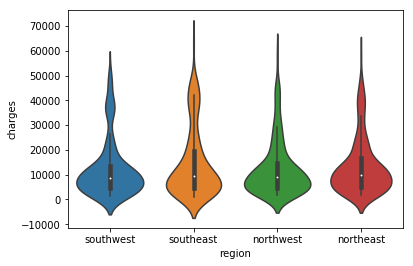

In [16]:
sns.violinplot(x='region',y='charges',data=data)

### Mean charges for southeast are slightly higher than the other regions.

In [17]:
data_grouped4=data.groupby('region').agg({'charges':'sum','sex':'count'})
data_grouped4['mean_charges3']=data_grouped4['charges']/data_grouped4['sex']
data_grouped4

,charges,sex,mean_charges3
region,,,
northeast,4.343669e+06,324,13406.384516
northwest,4.035712e+06,325,12417.575374
southeast,5.363690e+06,364,14735.411438
southwest,4.012755e+06,325,12346.937377


### Before working on our model, we will need to do some data preprocessing. For that lets check which features are categorical. Looking at the dtypes of the features (as done below), we find that we have 3 out of 7 features that have 'object' dtype. These are - sex, smoker and region. If we want to use them for predictive modelling then these need to be encoded . For features that have just two values like in case of smoker and sex, we use Label Encoder and for region we use one hot encoding .One hot encoding is better than label encoding when we have more than two values for any categorical feature. Below, you can see that I have encoded these 3 variables and checked the results.

In [18]:
print(data.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [19]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoder.fit(data['sex'].drop_duplicates())
data['sex']=encoder.transform(data['sex'])
encoder.fit(data['smoker'].drop_duplicates())
data['smoker']=encoder.transform(data['smoker'])
data1=pd.get_dummies(data['region'], prefix='region')
data= pd.concat([data,data1], axis=1).drop(['region'],axis=1)
print(data.head(2))
print(data.dtypes)

   age  sex    bmi  children  smoker     charges  region_northeast  \
0   19    0  27.90         0       1  16884.9240                 0   
1   18    1  33.77         1       0   1725.5523                 0   

   region_northwest  region_southeast  region_southwest  
0                 0                 0                 1  
1                 0                 1                 0  
age                   int64
sex                   int64
bmi                 float64
children              int64
smoker                int64
charges             float64
region_northeast      uint8
region_northwest      uint8
region_southeast      uint8
region_southwest      uint8
dtype: object


### Lets begin building a simple Linear Regression model. Model quality is checked by Root Mean Square Error (RMSE).


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
y= data['charges']
X = data.drop(['charges'], axis=1)
lin_reg=LinearRegression()
train_X, test_X, train_y, test_y = train_test_split(X.values, y.values, test_size=0.25, random_state=21)
lin_reg.fit(train_X,train_y)
pred_y=lin_reg.predict(test_X)
rmse = np.sqrt(mean_squared_error(test_y, pred_y))
print("RMSE: %f" % (rmse))

RMSE: 6168.155294


RMSE: 4793.130008


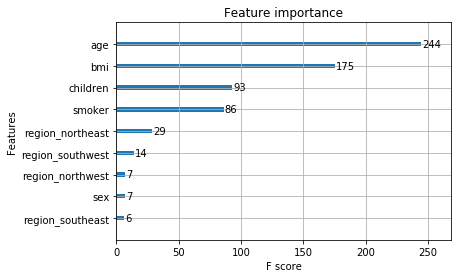

In [21]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from xgboost import plot_importance
import numpy as np

y= data['charges']
X = data.drop(['charges'], axis=1)
train_X, test_X, train_y, test_y = train_test_split(X.values, y.values, test_size=0.25, random_state=21)
train_X = pd.DataFrame(data=train_X, columns=X.columns)
test_X = pd.DataFrame(data=test_X, columns=X.columns)

model_x = XGBRegressor(n_estimators=1000, learning_rate=0.05)

model_x.fit(train_X, train_y, early_stopping_rounds=5,eval_set=[(test_X, test_y)], verbose=False)
predictions = model_x.predict(test_X)

rmse = np.sqrt(mean_squared_error(test_y, predictions))
print("RMSE: %f" % (rmse))
plot_importance(model_x)

### Further, I remove the following not-very important features- 'sex', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest', and check the RMSE. RMSE reduces to 4781 from previous value of 4793 suggesting that age, bmi, smoker and children are the important features.

In [22]:
y= data['charges']
X = data.drop(['charges','sex','region_northeast','region_northwest','region_southeast','region_southwest'], axis=1)
train_X, test_X, train_y, test_y = train_test_split(X.values, y.values, test_size=0.25, random_state=21)
train_X = pd.DataFrame(data=train_X, columns=X.columns)
test_X = pd.DataFrame(data=test_X, columns=X.columns)

model_x = XGBRegressor(n_estimators=1000, learning_rate=0.05)

model_x.fit(train_X, train_y, early_stopping_rounds=5,eval_set=[(test_X, test_y)], verbose=False)
predictions = model_x.predict(test_X)

rmse = np.sqrt(mean_squared_error(test_y, predictions))
print("RMSE: %f" % (rmse))

RMSE: 4781.648666


### Additionally, if I drop 'children' feature, the RMSE reduces further. Its worth mentioning here that if I drop any of the other three features, RMSE increases substantially suggesting that they are the key predictors of charges.

In [23]:
y= data['charges']
X = data.drop(['charges','sex','region_northeast','region_northwest','region_southeast','region_southwest','children'], axis=1)
train_X, test_X, train_y, test_y = train_test_split(X.values, y.values, test_size=0.25, random_state=21)
model_x = XGBRegressor(n_estimators=1000, learning_rate=0.05)
model_x.fit(train_X, train_y, early_stopping_rounds=5,eval_set=[(test_X, test_y)], verbose=False)
predictions = model_x.predict(test_X)
rmse = np.sqrt(mean_squared_error(test_y, predictions))
print("RMSE: %f" % (rmse))

RMSE: 4744.912713


### Conclusion
The key predictors of medical charges (obtained from this dataset) are age, bmi and smoking